#Emotion Detection


**Importing Libraries

In [3]:
import matplotlib.pyplot as plt   #to plot training losses and training accuracy 
from glob import glob           #to create list of all files present in directory
import cv2                        #for images
import random                     #to choose random number or anything randomly
import os
%matplotlib inline                

from tensorflow.keras.preprocessing.image import ImageDataGenerator    #imagedatagenerator is to create new images from existing ones
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D    #dense is like linear function, input functions decide input size, dropout is use when ml works on new data, flatten changes matrics, it covernts convocational layers
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D   #does normalization over data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.0-rc0


**Exploring Dataset

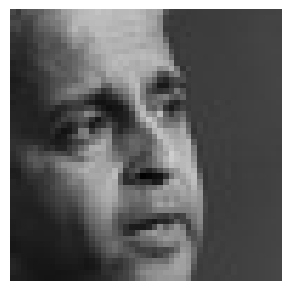

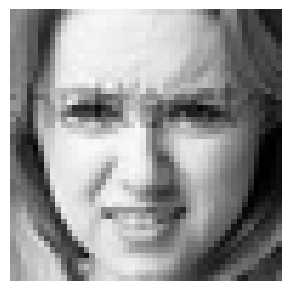

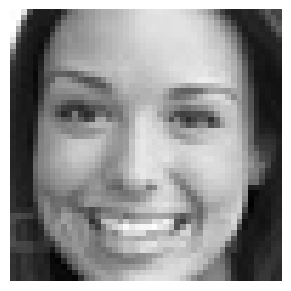

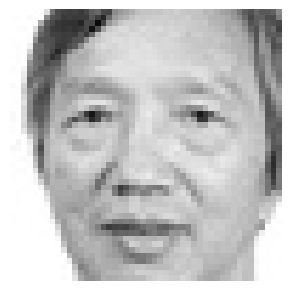

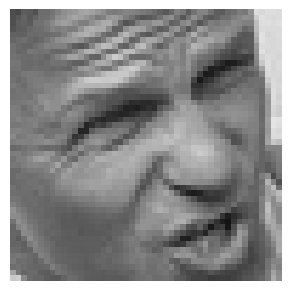

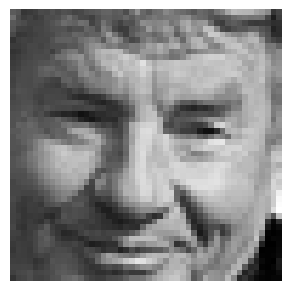

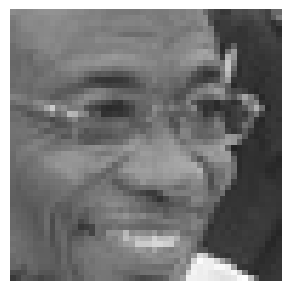

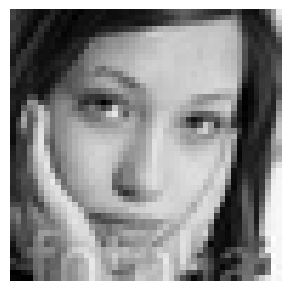

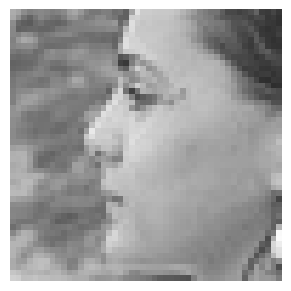

In [4]:
images = glob("train/**/**")  #first 2 stars to train images and last 2 to show images present here
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

preparing data for training

In [5]:
img_size = 48
batch_size = 66
datagen_train = ImageDataGenerator()
train_generator =  datagen_train.flow_from_directory("train/", 
                                                    target_size =(img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator =  datagen_train.flow_from_directory("test/", 
                                                    target_size =(img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)                                                    
                                                    
                                        

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


ABOVE CODE EXPLANATION
1.img size present in data 
2. batch size is hyperparameter given any number
3. import image data generator
4. tarin generator using image data generator and passing all necessory attributes
5. flow from dircetory is used because files are present is diff directory, as we are preparing for training we use train directory
6. target size is in which we have to input imgs, color mode is grayscale, batch size is define already, class mode is categorical beacause it has only 7 classes to predict, shuffle == true because it shuffle our data
7. same thing for validation 
8. and for validation we use test directory


**Defining Model**

In [6]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

ABOVE CODE EXPLANATION
1. variables used in first line, convolution layers is used to decrease the image and find features in images
2. create new function
3. conv2D is a convolution layers, we are defining number of filters which it has to find, so filters are approximately some features which it finds in the images to detet what images it is.
4. batch normalization is used to remove our fitting and to get a training process smoothely
5. activation relu is preffred , other functions like tan hn side mix can be used
6. maxpooling is to decrease the dimension of data so that the training can be done smoothely
7. dropout layer is use to overcome overheating 


In [7]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x
    

In [8]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32,(3,3))
    conv_2 = Convolution(inputs, 64,(5,5))
    conv_3 = Convolution(inputs, 128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs= [output])

    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

    return model

1. input shape is a shape which we are inputting to the model
2. in conv_1 we are calling convolution function and inputs is the input and service which we are passing it inputs 
3. flatten the outpt so we can pass the ouptput which we get from convolution layer to dense
4. calling dense function flatten it and sending nodes of 256
5. we use these layer because we have 7 clasees and output should be array of size 7, 7 nodes which each node use one value and activation is softmax 
6. create model, complie model

In [9]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

Initializing the model 

In [10]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

1. hyperparameter is epochs. we need to put large number but traning locally we can put small number
2. train generator . n it gives all the numbers of images 
3. // that it use an integer number  because we need integer number
4. so we are creating a model checkpoint so it stores all our model weights in model_weights.weights.h5 file at model valued accuracy. and it shows maximum validation accuracy.

Training the Model
[it takes time to complete]

In [11]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks
)

Epoch 1/15


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3293 - loss: 1.8339
Epoch 1: saving model to model_weights.weights.h5
434/434 ━━━━━━━━━━━━━━━━━━━━ 798s 2s/step - accuracy: 0.3294 - loss: 1.8335 - val_accuracy: 0.3380 - val_loss: 1.6757
Epoch 2/15
  1/434 ━━━━━━━━━━━━━━━━━━━━ 8:18 1s/step - accuracy: 0.3788 - loss: 1.4984
Epoch 2: saving model to model_weights.weights.h5


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


434/434 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3788 - loss: 0.7509 - val_accuracy: 0.3600 - val_loss: 0.9156
Epoch 3/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4854 - loss: 1.3504
Epoch 3: saving model to model_weights.weights.h5
434/434 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.4854 - loss: 1.3504 - val_accuracy: 0.4214 - val_loss: 1.4971
Epoch 4/15
  1/434 ━━━━━━━━━━━━━━━━━━━━ 9:24 1s/step - accuracy: 0.5303 - loss: 1.3731
Epoch 4: saving model to model_weights.weights.h5
434/434 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5303 - loss: 0.6881 - val_accuracy: 0.3800 - val_loss: 0.8081
Epoch 5/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5651 - loss: 1.1717
Epoch 5: saving model to model_weights.weights.h5
434/434 ━━━━━━━━━━━━━━━━━━━━ 782s 2s/step - accuracy: 0.5651 - loss: 1.1717 - val_accuracy: 0.4212 - val_loss: 1.5211
Epoch 6/15
  1/434 ━━━━━━━━━━━━━━━━━━━━ 7:53 1s/step - accuracy: 0.4697 - loss: 1.3036
Epoch 6: saving model to model_weigh

model evaluation validation

In [16]:
model.evaluate(validation_generator)

109/109 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.4627 - loss: 1.6454


[1.6784489154815674, 0.4626636803150177]

plotting loss

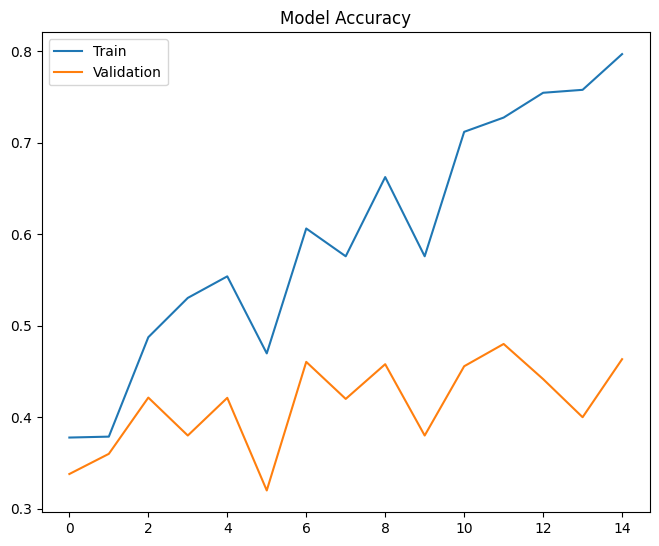

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

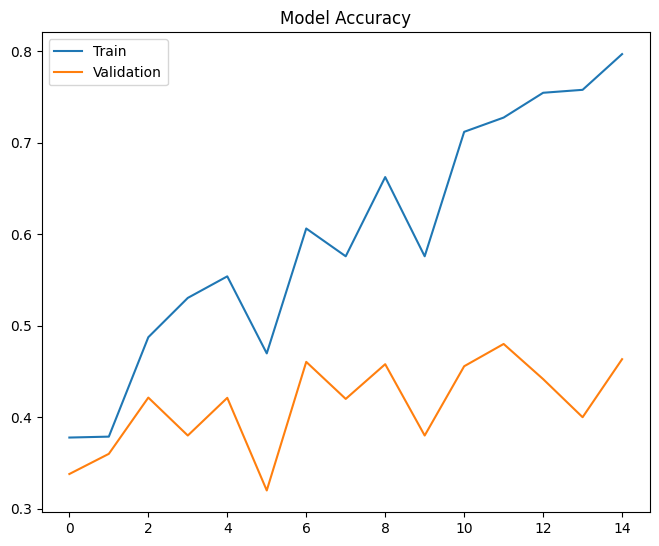

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [21]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)